In [ ]:
#using the code of hw4 as a basecode in this hw

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


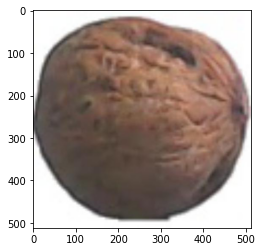

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/train/"
categories = ["1-Tomato 3", "2-Tomato 4", "3-Tomato Cherry Red", "4-Tomato Maroon", "5-Tomato Yellow", "6-Walnut"]
for x in categories:
  path = os.path.join(DATADIR,x)
  for img in os.listdir(path):
     try:
       #img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
       #plt.imshow(img_array, cmap = "gray")
       img_array = plt.imread(os.path.join(path,img))
       plt.imshow(img_array)
     except Exception as e:
       pass

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 CK			     HW4-19702-Huda.ipynb	    XandO
'HW4_19702_Huda (1).ipynb'   HW5.e-19702-Huda.ipynb
 HW4_19702_Huda.ipynb	     multiclass-image-competition


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2
import numpy as np
import random
rows = 50
columns = 50
#DATADIR = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/train/"
#categories = ["1-Tomato 3", "2-Tomato 4", "3-Tomato Cherry Red", "4-Tomato Maroon", "5-Tomato Yellow", "6-Walnut"]
training_data = []
def create_training_data():
  for category in categories:
    path = os.path.join(DATADIR,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        #img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        #new_array = cv2.resize(img_array, (rows, columns))
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        new_array = cv2.resize(img_array, (rows,columns)) #,interpolation = cv2.INTER_CUBIC)
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()
print(len(training_data))
random.shuffle(training_data)
y = [0.0,0.0,0.0,0.0,0.0,0.0]
X = []
Y = []
for features,label in training_data:
  y[label] = 1.0
  X.append(features)
  Y.append(y)
  y = [0.0,0.0,0.0,0.0,0.0,0.0]

#X = np.array(X).reshape(-1,rows,columns,1)
X = np.array(X).reshape(-1,rows,columns,3)
Y = np.array(Y)
X = X/255.0

2330


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils import normalize

#X = normalize(X)
#print("X",X)
#Y = to_categorical(Y)
#print("Y",Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

#print("X.shape=",X.shape)
#print("x_train.shape=",x_train.shape)
#print("y_train.shape=",y_train.shape)
#print("x_test.shape=",x_test.shape)
#print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
model = Sequential()

model.add(Conv2D(7,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D())

#model.add(Conv2D(14,(3,3)))
model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(64))

model.add(Dropout(0.2))
#model.add(Activation('softmax'))
model.add(Dense(6,activation='softmax'))


#model.add(Conv2D(64,(3,3),activation='relu',input_shape = x_train.shape[1:]))
#model.add(BatchNormalization())

#model.add(Conv2D(32,(3,3),activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64,(3,3), activation = 'relu'))
#model.add(BatchNormalization())

#model.add(Conv2D(64,(3,3), activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Flatten())
#model.add(Dense(10))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(10, activation = 'softmax'))

#model.add(Dropout(0.2))
#model.add(Dense(1))
#model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
#model.summary()
model.fit(x_train, y_train,batch_size=32,epochs=60,validation_data=(x_test,y_test),verbose=2)

Epoch 1/60
59/59 - 1s - loss: 1.1910 - accuracy: 0.5912 - val_loss: 0.4511 - val_accuracy: 0.9807
Epoch 2/60
59/59 - 0s - loss: 0.2404 - accuracy: 0.9517 - val_loss: 0.0714 - val_accuracy: 0.9957
Epoch 3/60
59/59 - 0s - loss: 0.0776 - accuracy: 0.9823 - val_loss: 0.0284 - val_accuracy: 0.9957
Epoch 4/60
59/59 - 0s - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.0151 - val_accuracy: 0.9979
Epoch 5/60
59/59 - 0s - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0173 - val_accuracy: 0.9957
Epoch 6/60
59/59 - 0s - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 7/60
59/59 - 0s - loss: 0.0199 - accuracy: 0.9946 - val_loss: 0.0109 - val_accuracy: 0.9957
Epoch 8/60
59/59 - 0s - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 9/60
59/59 - 0s - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0051 - val_accuracy: 0.9979
Epoch 10/60
59/59 - 0s - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 11/60
59/59 -

In [ ]:
PATH = "/content/drive/My Drive/Colab Notebooks/multiclass-image-competition/test/"
file = open("/content/drive/MyDrive/Colab Notebooks/results.csv","x")
file.write("filename,category")
file.write("\n")

comma = ","
for img in os.listdir(PATH):
  img_array = cv2.imread(os.path.join(PATH,img),cv2.IMREAD_COLOR)
  new_array = cv2.resize(img_array,(50,50))
  new_array = new_array/255.0
  new_array = tf.expand_dims(new_array,0)
  result = model.predict(new_array)
  index = -1
  y = result[0]
  max = -1.0
  for x in range(6):
    if(y[x]>max):
      max = y[x]
      index = x
  S = "% s" % (index+1)
  s = img + comma + S
  file.write(s)
  file.write("\n")
  #print(s)
file.close()